In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
import seaborn as sns

# Load the data
log_file_path = "/home/aljazjustin/blockdoku_AI/blockdoku-AI/logs/training_log_20250508-112052.json" 
try:
    with open(log_file_path, 'r') as f:
        data = json.load(f)
except FileNotFoundError:
    print(f"Error: Log file not found at {log_file_path}")
    exit()
except json.JSONDecodeError:
    print(f"Error: Could not decode JSON from {log_file_path}")
    exit()

# Convert episodes list to DataFrame
if 'episodes' not in data or not isinstance(data['episodes'], list) or not data['episodes']:
    print(f"Error: 'episodes' key not found in JSON, is not a list, or is empty.")
    exit()
df = pd.DataFrame(data['episodes'])

if df.empty:
    print("Error: DataFrame is empty after loading episodes. Check log content.")
    exit()


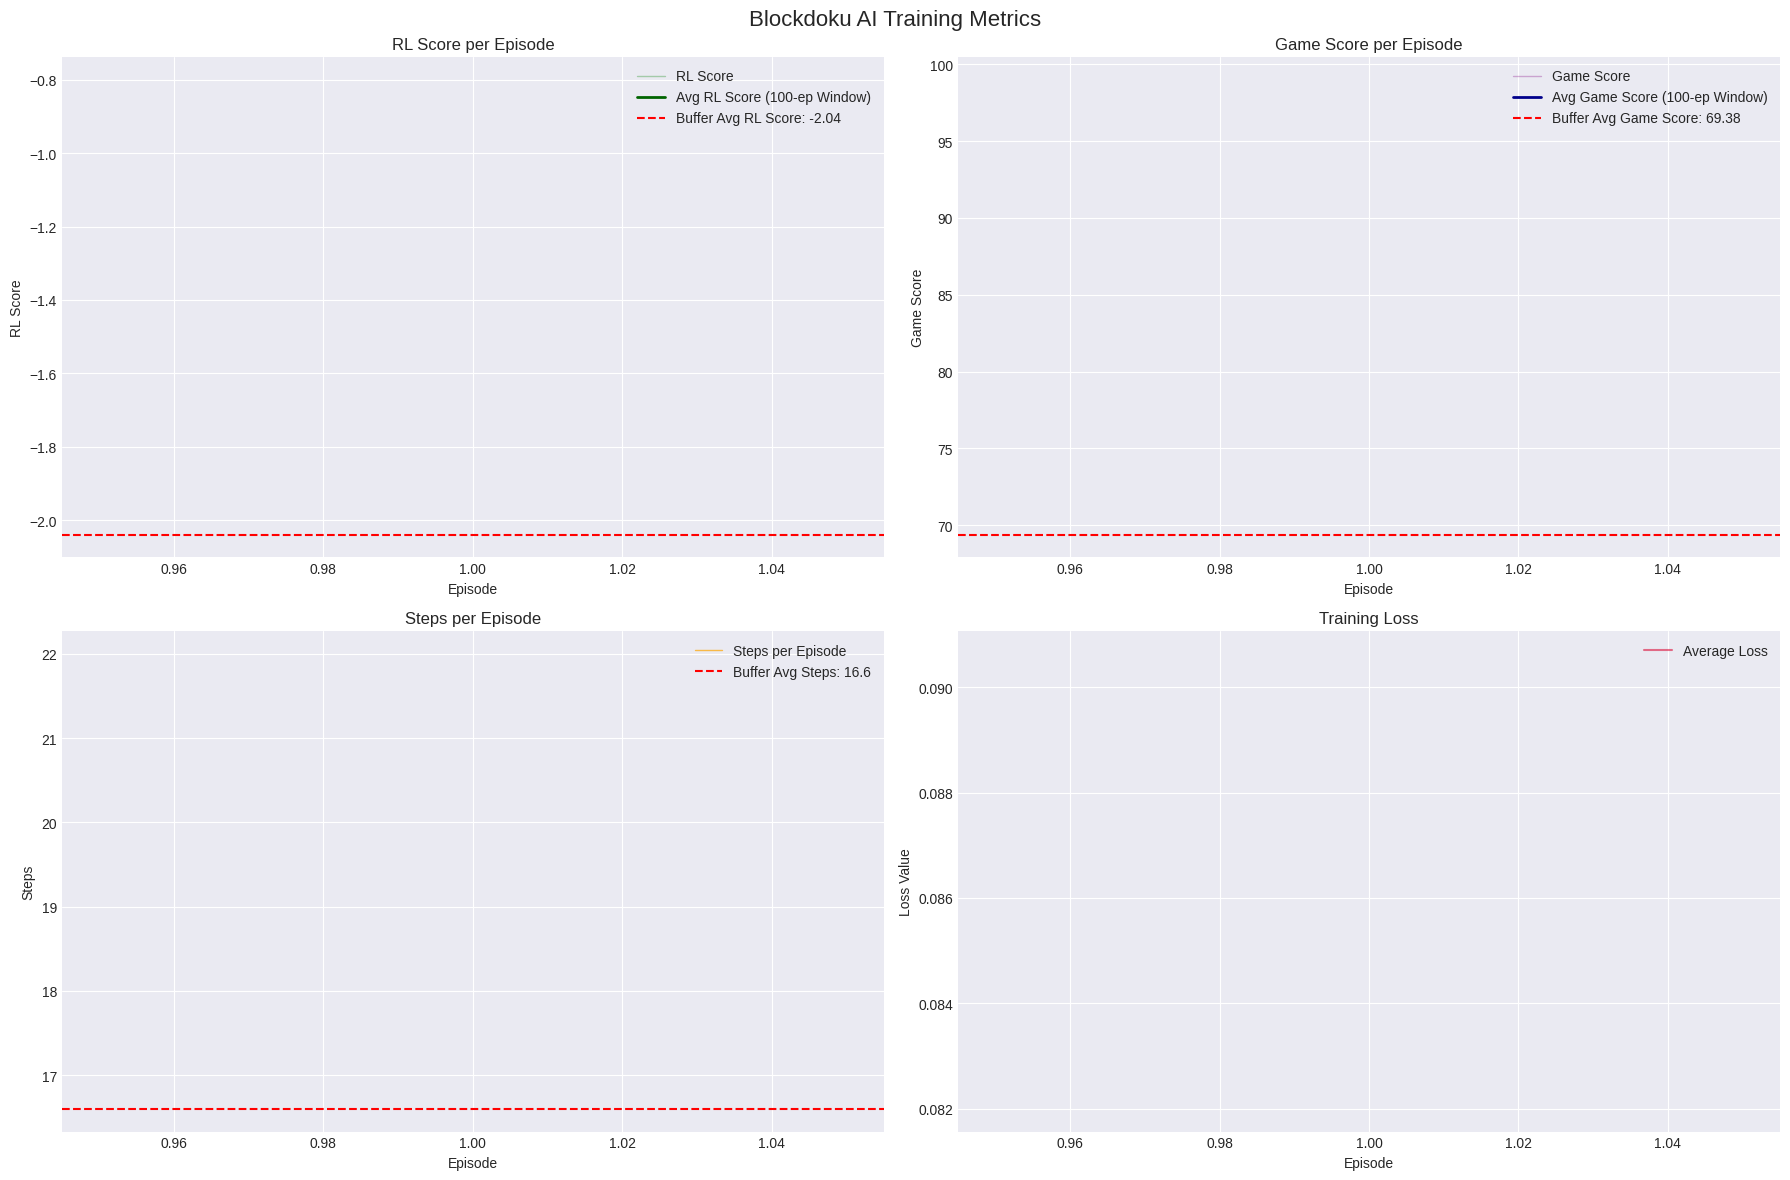

In [45]:
# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")

# Create a figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Blockdoku AI Training Metrics', fontsize=16)

# 1. RL Score plot (top-left)
if 'episode' in df.columns and 'rl_score' in df.columns:
    # Raw scores with low alpha
    axes[0, 0].plot(df['episode'], df['rl_score'], color='green', linewidth=1, alpha=0.3, label='RL Score')
    
    # Pre-calculated average from the data file
    if 'avg_rl_score' in df.columns:
        axes[0, 0].plot(df['episode'], df['avg_rl_score'], 
                      color='darkgreen', linewidth=2,
                      label='Avg RL Score (100-ep Window)')
    
    # Add horizontal line for buffer average RL score
    buffer_avg_rl_score = -2.04
    axes[0, 0].axhline(y=buffer_avg_rl_score, color='red', linestyle='--', linewidth=1.5, 
                     label=f'Buffer Avg RL Score: {buffer_avg_rl_score:.2f}')
    
    axes[0, 0].set_title('RL Score per Episode')
    axes[0, 0].set_xlabel('Episode')
    axes[0, 0].set_ylabel('RL Score')
    axes[0, 0].legend()
else:
    axes[0, 0].set_title('RL Score Data Missing')
axes[0, 0].grid(True)

# 2. Game Score plot (top-right)
if 'episode' in df.columns and 'game_score' in df.columns:
    # Raw scores with low alpha
    axes[0, 1].plot(df['episode'], df['game_score'], color='purple', linewidth=1, alpha=0.3, label='Game Score')
    
    # Pre-calculated average from the data file
    if 'avg_game_score' in df.columns:
        axes[0, 1].plot(df['episode'], df['avg_game_score'], 
                      color='darkblue', linewidth=2,
                      label='Avg Game Score (100-ep Window)')
    
    # Add horizontal line for buffer average game score
    buffer_avg_game_score = 69.38
    axes[0, 1].axhline(y=buffer_avg_game_score, color='red', linestyle='--', linewidth=1.5, 
                     label=f'Buffer Avg Game Score: {buffer_avg_game_score:.2f}')
    
    axes[0, 1].set_title('Game Score per Episode')
    axes[0, 1].set_xlabel('Episode')
    axes[0, 1].set_ylabel('Game Score')
    axes[0, 1].legend()
else:
    axes[0, 1].set_title('Game Score Data Missing')
axes[0, 1].grid(True)

# 3. Steps per Episode plot (bottom-left)
if 'episode' in df.columns and 'steps' in df.columns:
    axes[1, 0].plot(df['episode'], df['steps'], color='orange', linewidth=1, alpha=0.7, label='Steps per Episode')
    
    # Calculate moving average for steps
    window_size = 100
    if len(df['steps']) >= window_size:
        steps_ma = df['steps'].rolling(window=window_size, min_periods=1).mean()
        axes[1, 0].plot(df['episode'], steps_ma, 
                      color='brown', linewidth=2, linestyle='--',
                      label=f'{window_size}-ep Moving Average')
    
    # Add horizontal line for buffer average steps
    buffer_avg_steps = 16.6
    axes[1, 0].axhline(y=buffer_avg_steps, color='red', linestyle='--', linewidth=1.5, 
                     label=f'Buffer Avg Steps: {buffer_avg_steps:.1f}')
    
    axes[1, 0].set_title('Steps per Episode')
    axes[1, 0].set_xlabel('Episode')
    axes[1, 0].set_ylabel('Steps')
    axes[1, 0].legend()
else:
    axes[1, 0].set_title('Steps Data Missing')
axes[1, 0].grid(True)

# 4. Loss plot (bottom-right) - using the pre-calculated avg_loss
if 'episode' in df.columns and 'avg_loss' in df.columns:
    axes[1, 1].plot(df['episode'], df['avg_loss'], color='crimson', linewidth=1.5, alpha=0.6, label='Average Loss')
    
    # Add moving average for smoothing
    window_size = 100
    if len(df['avg_loss']) >= window_size:
        loss_ma = df['avg_loss'].rolling(window=window_size, min_periods=1).mean()
        axes[1, 1].plot(df['episode'], loss_ma, 
                      color='darkred', linewidth=2.5, linestyle='--',
                      label=f'{window_size}-ep Moving Average')
    
    axes[1, 1].set_title('Training Loss')
    axes[1, 1].set_xlabel('Episode')
    axes[1, 1].set_ylabel('Loss Value')
    axes[1, 1].legend()
else:
    axes[1, 1].set_title('Loss Data Missing')
axes[1, 1].grid(True)

plt.tight_layout()
plt.subplots_adjust(top=0.94) 
plt.show()

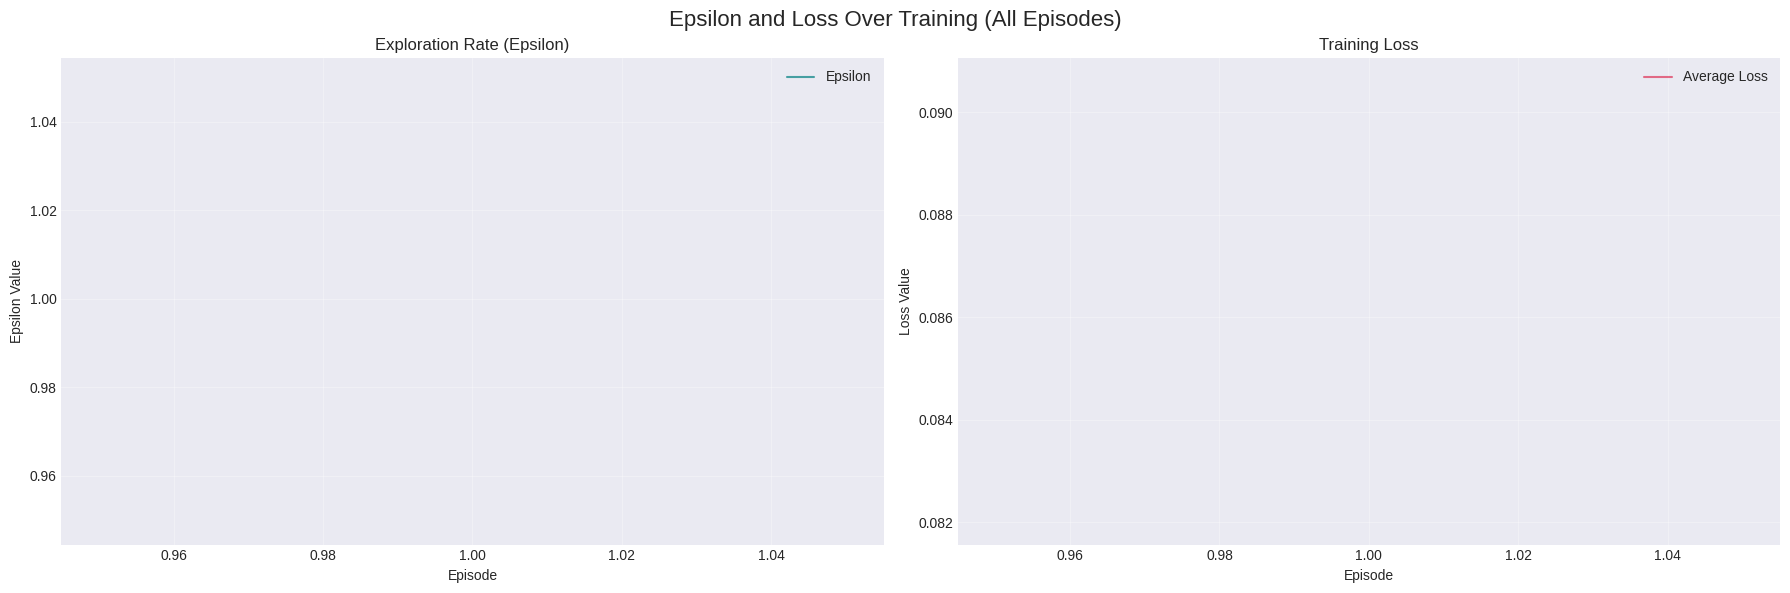

In [46]:

# Plot epsilon and loss values over training (all episodes)
fig_el, axes_el = plt.subplots(1, 2, figsize=(18, 6))
fig_el.suptitle('Epsilon and Loss Over Training (All Episodes)', fontsize=16)

# Epsilon plot
if 'episode' in df.columns and 'epsilon' in df.columns:
    axes_el[0].plot(df['episode'], df['epsilon'], color='teal', linewidth=1.5, alpha=0.7, label='Epsilon')
    if len(df['epsilon']) >= window_size:
        epsilon_ma = df['epsilon'].rolling(window=window_size, min_periods=1).mean()
        axes_el[0].plot(df['episode'], epsilon_ma, 
                 color='darkblue', linewidth=2.5, linestyle='--',
                 label=f'{window_size}-ep Moving Average (Epsilon)')
    axes_el[0].set_title('Exploration Rate (Epsilon)')
    axes_el[0].set_xlabel('Episode')
    axes_el[0].set_ylabel('Epsilon Value')
    axes_el[0].grid(True, alpha=0.3)
    axes_el[0].legend()
else:
    axes_el[0].set_title('Epsilon Data Missing')

# Loss plot
if 'episode' in df.columns and 'avg_loss' in df.columns:
    axes_el[1].plot(df['episode'], df['avg_loss'], color='crimson', linewidth=1.5, alpha=0.6, label='Average Loss')
    if len(df['avg_loss']) >= window_size:
        loss_ma = df['avg_loss'].rolling(window=window_size, min_periods=1).mean()
        axes_el[1].plot(df['episode'], loss_ma, 
                 color='darkred', linewidth=2.5, linestyle='--',
                 label=f'{window_size}-ep Moving Average (Loss)')
    axes_el[1].set_title('Training Loss')
    axes_el[1].set_xlabel('Episode')
    axes_el[1].set_ylabel('Loss Value')
    axes_el[1].grid(True, alpha=0.3)
    axes_el[1].legend()
else:
    axes_el[1].set_title('Loss Data Missing')

plt.tight_layout()
plt.subplots_adjust(top=0.90) 
plt.show()

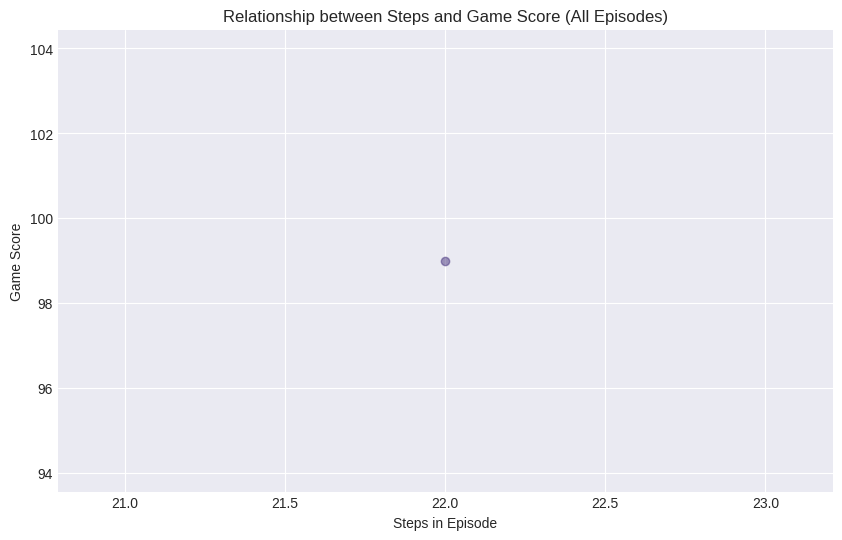

In [47]:
# Create another figure to analyze the correlation between game score and steps
# This will also use data from the learning phase onwards
plt.figure(figsize=(10, 6))
plot_data_for_correlation = df_learning if start_learning_episode > 1 and not learning_starts_df_empty and not df_learning.empty else df

if not plot_data_for_correlation.empty and 'steps' in plot_data_for_correlation.columns and game_score_col in plot_data_for_correlation.columns:
    plt.scatter(plot_data_for_correlation['steps'], plot_data_for_correlation[game_score_col], alpha=0.5)
    title_suffix_corr = f'(From Ep {start_learning_episode})' if start_learning_episode > 1 and not learning_starts_df_empty and not df_learning.empty else '(All Episodes)'
    plt.title(f'Relationship between Steps and Game Score {title_suffix_corr}')
    
    valid_corr_data = plot_data_for_correlation[['steps', game_score_col]].dropna()
    if len(valid_corr_data) > 1: 
        z = np.polyfit(valid_corr_data['steps'], valid_corr_data[game_score_col], 1)
        p = np.poly1d(z)
        min_steps = valid_corr_data['steps'].min()
        max_steps = valid_corr_data['steps'].max()
        if min_steps is not np.nan and max_steps is not np.nan and min_steps < max_steps :
             plt.plot(np.arange(min_steps, max_steps + 1), p(np.arange(min_steps, max_steps + 1)), "r--", linewidth=2, label='Trendline')
        plt.legend()
else:
    plt.title('Steps vs Game Score Data Missing or Insufficient')

plt.xlabel('Steps in Episode')
plt.ylabel('Game Score')
plt.grid(True)
plt.show()

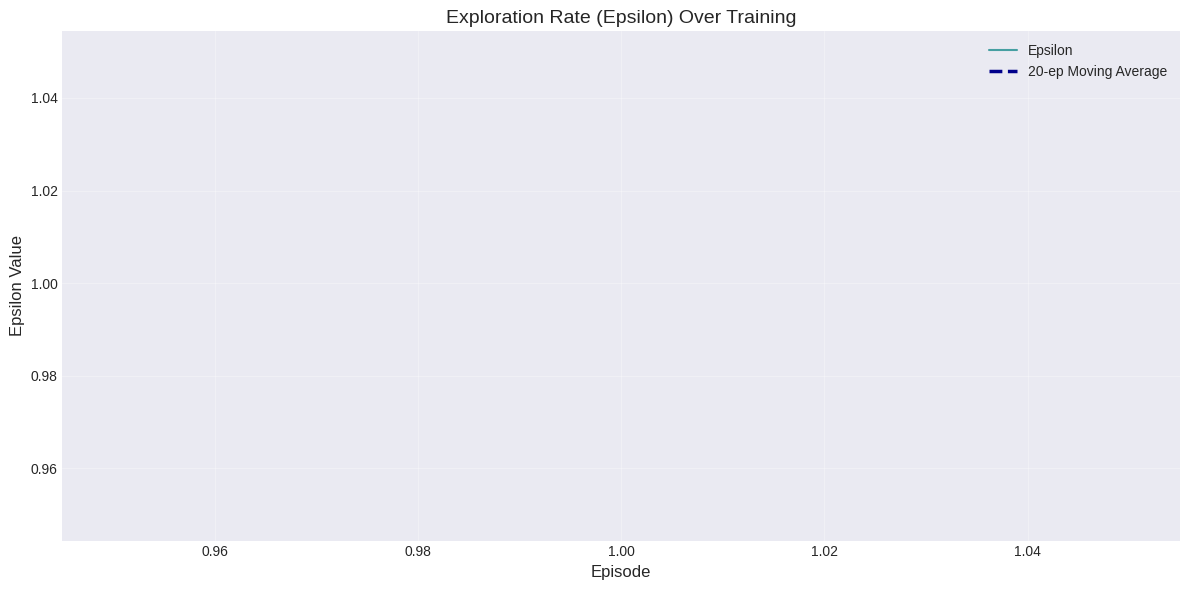

In [48]:
# Plot epsilon values over training
plt.figure(figsize=(12, 6))

# Main epsilon plot
plt.plot(df['episode'], df['epsilon'], color='teal', linewidth=1.5, alpha=0.7, label='Epsilon')

# Add moving average line
window_size = 20
epsilon_ma = df['epsilon'].rolling(window=window_size).mean()
plt.plot(df['episode'][window_size-1:], epsilon_ma[window_size-1:], 
         color='darkblue', linewidth=2.5, linestyle='--',
         label=f'{window_size}-ep Moving Average')

# Add styling and labels
plt.title('Exploration Rate (Epsilon) Over Training', fontsize=14)
plt.xlabel('Episode', fontsize=12)
plt.ylabel('Epsilon Value', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=10)

plt.tight_layout()
plt.show()

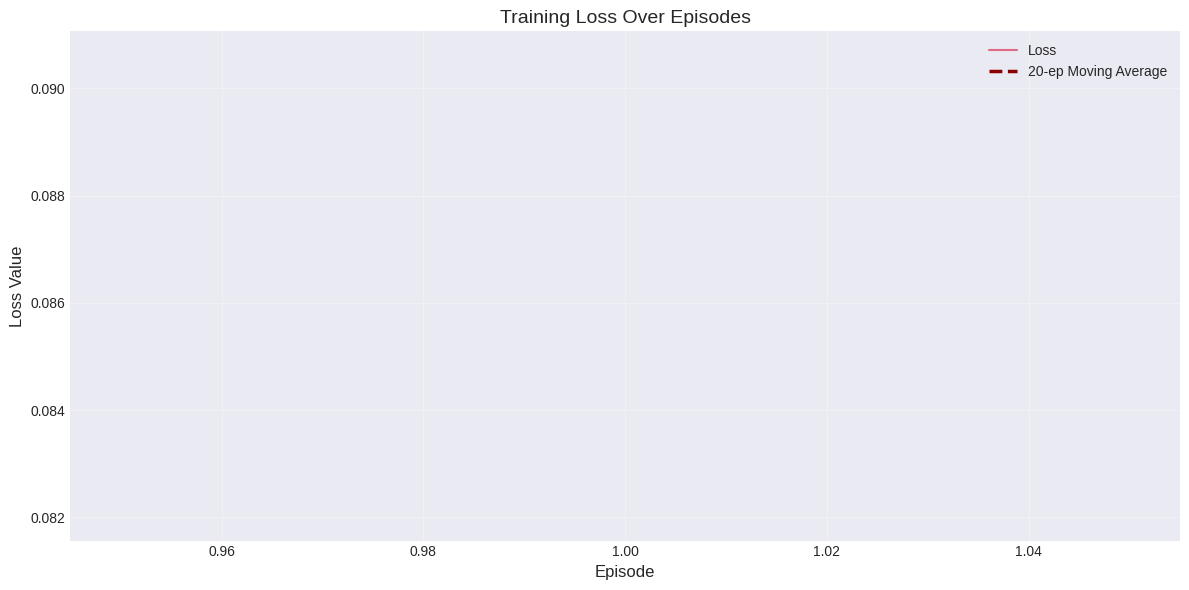

In [49]:
# Plot loss values over training
plt.figure(figsize=(12, 6))

# Check if loss data exists in the DataFrame
if 'avg_loss' in df.columns:
    # Main loss plot
    plt.plot(df['episode'], df['avg_loss'], color='crimson', linewidth=1.5, alpha=0.6, label='Loss')
    
    # Add moving average line
    window_size = 20
    loss_ma = df['avg_loss'].rolling(window=window_size).mean()
    plt.plot(df['episode'][window_size-1:], loss_ma[window_size-1:], 
             color='darkred', linewidth=2.5, linestyle='--',
             label=f'{window_size}-ep Moving Average')
    
    # Add styling and labels
    plt.title('Training Loss Over Episodes', fontsize=14)
    plt.xlabel('Episode', fontsize=12)
    plt.ylabel('Loss Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.legend(fontsize=10)
    
    plt.tight_layout()
    plt.show()
else:
    print("Loss data not found in the training log. Make sure 'avg_loss' is being recorded.")